<h1>Park domain</h1>

<p>This notebook will discuss role of Park transformation both for dynamic modeling of three phase systems and also for the evalution of the power components</p>
<p>Let us consider the following circuit</p>

<img src="CircuitPark.png" alt="drawing" width="600"  height="300"/>

<p>For sake of simplicity we consider a symmetrical balanced network</p>
<p>Input data</p>

In [2]:
SetSimulationEnvironment;

% Voltage RMS for va,vb,vc
Vn = 220

% Line Inductance La,Lb,Lc
L = 0.01


% Line resistance Ra,Rb,Rc
R = 1

Vn =  220
L =  0.010000
R =  1


<p>The Park model can be defined in a fixed or rotating frame</p>
<p>Let us start with the fixed reference frame. A state space model can written as in the following</p>

In [3]:
Af = [-R/L 0;0 -R/L]
Bf = [1/L 0; 0 1/L]
C = eye(2)
D = [0 0;0 0]

Af =

  -100     0
     0  -100

Bf =

   100     0
     0   100

C =

Diagonal Matrix

   1   0
   0   1

D =

   0   0
   0   0



<p>The eigenvalues of this model are</p>

In [4]:
eigs(Af)

ans =

  -100
  -100



<p>Let us now consider a rotating frame</p>

In [5]:
% Frame speed
om = 2*pi*50;

Ar = [-R/L om;-om -R/L]
Br = [1/L 0; 0 1/L]

Ar =

  -100.00   314.16
  -314.16  -100.00

Br =

   100     0
     0   100



<p>The eigenvalues are in this case</p>

In [6]:
eigs(Ar)

ans =

  -100.00 + 314.16i
  -100.00 - 314.16i



<p>Let us now simulate the system to appreciate the differences</p>

In [7]:
% Simulation Parameters
% Start time
tini = 0;
% End time
tfinal = 0.1;
% Time Step
dt = 0.0001;
% Number of data flows in the schematic
nflows = 24;

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

ph = pi/6;

% List of components
c1{1} = SinusoidalSignalSource(1,sqrt(2)*Vn,om,ph);
c1{2} = SinusoidalSignalSource(2,sqrt(2)*Vn,om,ph-2*pi/3);
c1{3} = SinusoidalSignalSource(3,sqrt(2)*Vn,om,ph-4*pi/3);
c1{4} = Constant(4,om);
c1{5} = Integrator(4,5,0);
c1{6} = Constant(6,0);
c1{7} = Park(1,2,3,7,8,9,6);
c1{8} = Park(1,2,3,10,11,12,5);
c1{9} = StateSpace([7,8],[13,14],Af,Bf,C,D,[0;0]);
c1{10} = StateSpace([10,11],[15,16],Ar,Br,C,D,[0;0]);
c1{11} = InvPark(13,14,6,17,18,19,6);
c1{12} = InvPark(15,16,6,20,21,22,5);
c1{13} = Fcnu([10,11,15,16],23,"u(1)*u(3)-u(2)*u(4)");
c1{14} = Fcnu([10,11,15,16],24,"-u(1)*u(4)+u(2)*u(3)");

sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([7,8,10,11,13,14,15,16,17,20,23,24]);

<p>Let us first analyzed voltage in both Park fixed frame</p>

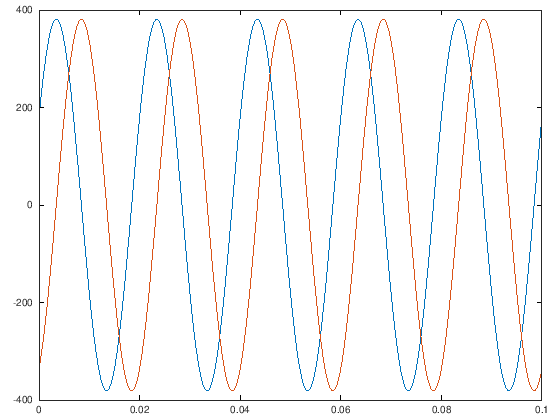

In [8]:
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:));

<p>The correspondent current in fixed frame</p>

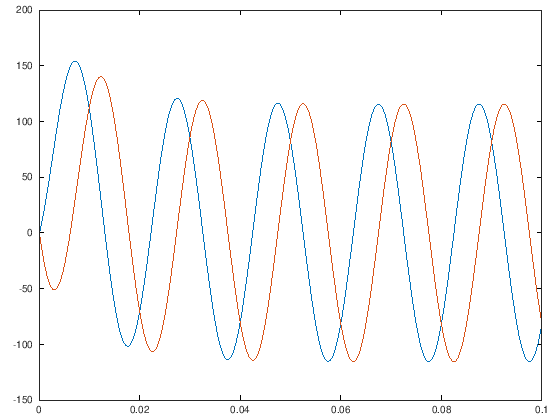

In [9]:
plot(out1(1,:),out1(6,:),out1(1,:),out1(7,:));

<p>The voltages in rotating frame are</p>

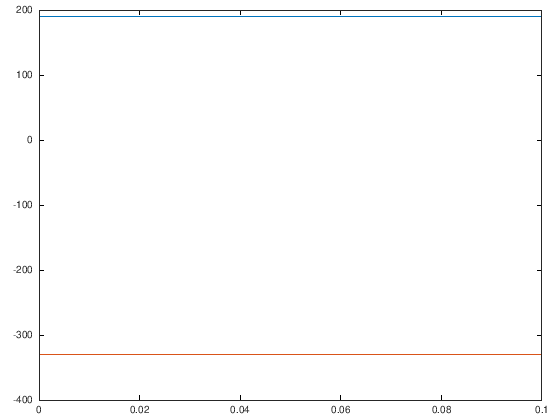

In [10]:
plot(out1(1,:),out1(4,:),out1(1,:),out1(5,:));

<p>while the currents are</p>

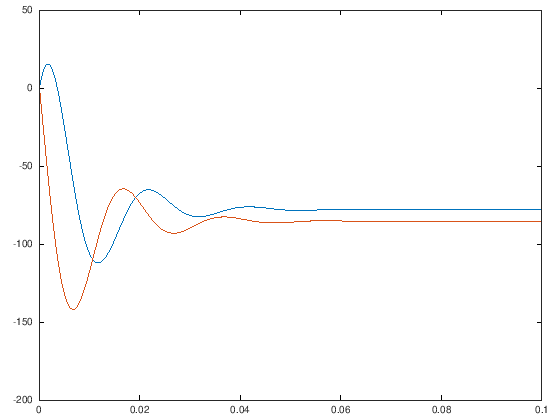

In [11]:
plot(out1(1,:),out1(8,:),out1(1,:),out1(9,:));

<p>In the three phase domains the results are independent from which Park domain we used</p>

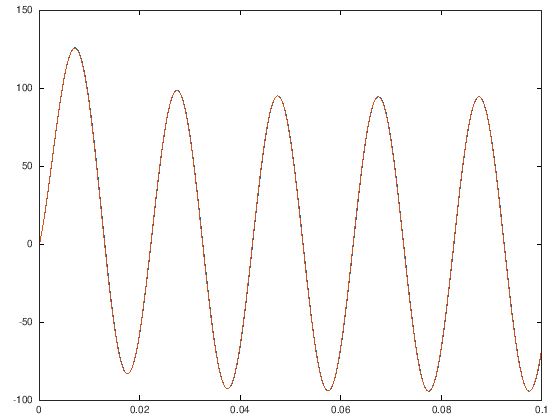

In [12]:
plot(out1(1,:),out1(10,:),out1(1,:),out1(11,:));

<p>We can also calculate the instantaneous Park power components</p>

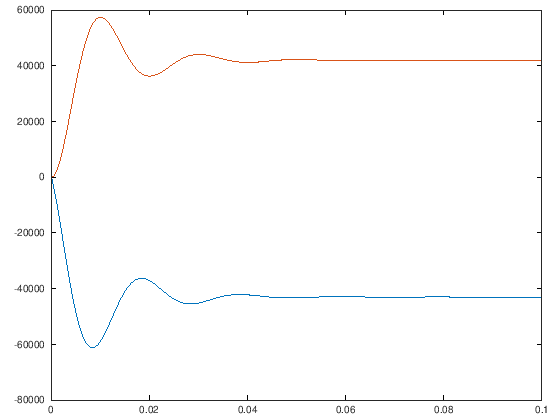

In [13]:
plot(out1(1,:),out1(12,:),out1(1,:),out1(13,:));